In [ ]:
# Cell 1: Import Libraries and Setup
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configure plotting
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
warnings.filterwarnings("ignore")

# Set figure size defaults
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

print("📊 Abalone Age Prediction - Comprehensive EDA")
print("=" * 50)

📊 Abalone Age Prediction - Comprehensive EDA


In [ ]:
# Cell 1: Import Libraries and Setup
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configure plotting
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")
warnings.filterwarnings("ignore")

# Set figure size defaults
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10

print("📊 Abalone Age Prediction - Comprehensive EDA")
print("=" * 50)

📊 Abalone Age Prediction - Comprehensive EDA


In [ ]:
# Cell 2: Load and Initial Data Inspection
# Load the dataset
df = pd.read_csv("../data/abalone.csv")

print("🔍 DATASET OVERVIEW")
print("=" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n📋 Column Information:")
print(df.info())

print("\n🎯 First 5 rows:")
df.head()

🔍 DATASET OVERVIEW
Dataset shape: (4177, 9)
Memory usage: 0.45 MB

📋 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

🎯 First 5 rows:


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Cell 3: Data Quality Assessment
print("🔍 DATA QUALITY ASSESSMENT")
print("=" * 40)

# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing_values, "Missing Percentage": missing_percent}).sort_values(
    "Missing Count", ascending=False
)
print(missing_df)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

# Data types
print(f"\n📊 Data types:")
print(df.dtypes)

# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print(f"\n🏷️ Categorical columns unique values:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

🔍 DATA QUALITY ASSESSMENT
Missing values per column:
                Missing Count  Missing Percentage
Sex                         0                 0.0
Length                      0                 0.0
Diameter                    0                 0.0
Height                      0                 0.0
Whole weight                0                 0.0
Shucked weight              0                 0.0
Viscera weight              0                 0.0
Shell weight                0                 0.0
Rings                       0                 0.0

🔄 Duplicate rows: 0

📊 Data types:
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

🏷️ Categorical columns unique values:
Sex: ['M' 'F' 'I']


In [ ]:
# Cell 4: Basic Statistical Summary
print("📈 STATISTICAL SUMMARY")
print("=" * 30)

# Basic statistics for numerical columns
print("Numerical columns summary:")
numerical_summary = df.describe()
print(numerical_summary)

# Additional statistics
print("\n📊 Additional Statistics:")
numerical_cols = df.select_dtypes(include=[np.number]).columns

stats_df = pd.DataFrame(
    {
        "Skewness": df[numerical_cols].skew(),
        "Kurtosis": df[numerical_cols].kurtosis(),
        "Variance": df[numerical_cols].var(),
        "Range": df[numerical_cols].max() - df[numerical_cols].min(),
    }
)
print(stats_df)

📈 STATISTICAL SUMMARY
Numerical columns summary:
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.00

🎯 TARGET VARIABLE ANALYSIS
Target variable: Rings


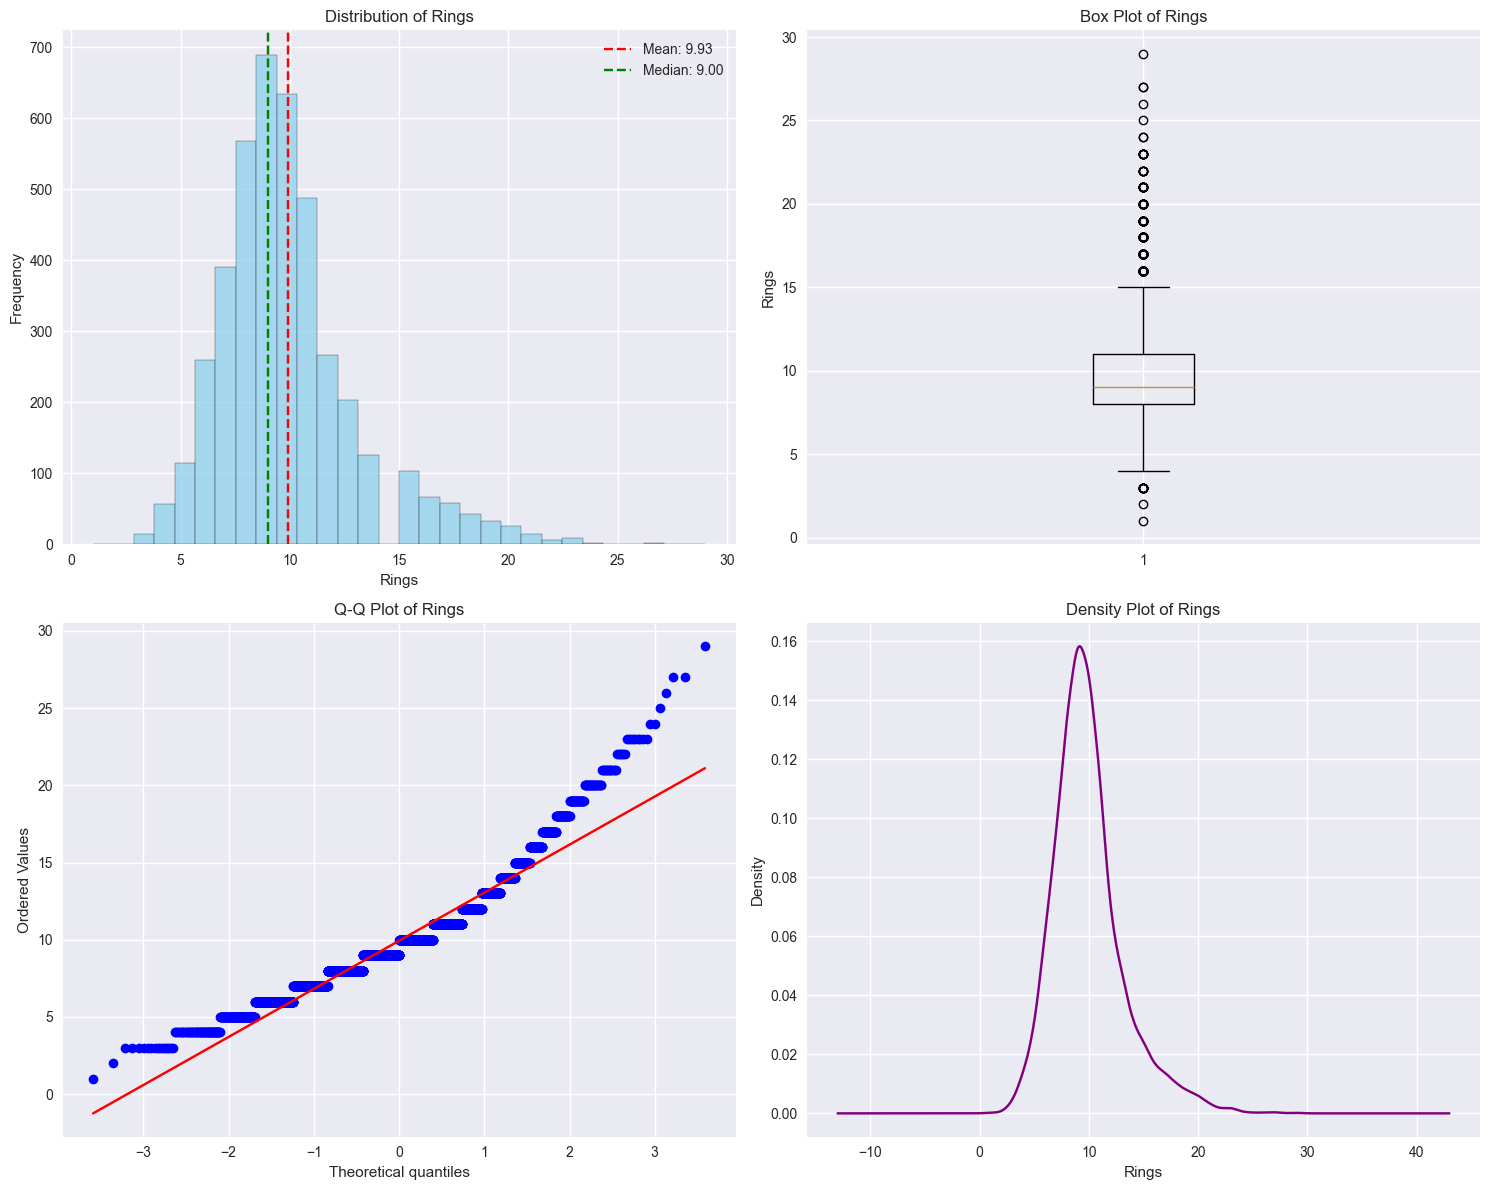


📊 Rings Statistics:
Mean: 9.93
Median: 9.00
Mode: 9.00
Standard Deviation: 3.22
Skewness: 1.11
Kurtosis: 2.33
Range: 1.00 - 29.00


In [ ]:
# Cell 5: Target Variable Analysis (Rings/Age)
print("🎯 TARGET VARIABLE ANALYSIS")
print("=" * 35)

# Assuming 'Rings' is the target variable (age indicator)
target_col = "Rings" if "Rings" in df.columns else df.columns[-1]
print(f"Target variable: {target_col}")

# Target distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist(df[target_col], bins=30, alpha=0.7, color="skyblue", edgecolor="black")
axes[0, 0].axvline(df[target_col].mean(), color="red", linestyle="--", label=f"Mean: {df[target_col].mean():.2f}")
axes[0, 0].axvline(df[target_col].median(), color="green", linestyle="--", label=f"Median: {df[target_col].median():.2f}")
axes[0, 0].set_title(f"Distribution of {target_col}")
axes[0, 0].set_xlabel(target_col)
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df[target_col])
axes[0, 1].set_title(f"Box Plot of {target_col}")
axes[0, 1].set_ylabel(target_col)

# Q-Q plot
stats.probplot(df[target_col], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title(f"Q-Q Plot of {target_col}")

# Density plot
df[target_col].plot(kind="density", ax=axes[1, 1], color="purple")
axes[1, 1].set_title(f"Density Plot of {target_col}")
axes[1, 1].set_xlabel(target_col)

plt.tight_layout()
plt.show()

# Target statistics
print(f"\n📊 {target_col} Statistics:")
print(f"Mean: {df[target_col].mean():.2f}")
print(f"Median: {df[target_col].median():.2f}")
print(f"Mode: {df[target_col].mode().iloc[0]:.2f}")
print(f"Standard Deviation: {df[target_col].std():.2f}")
print(f"Skewness: {df[target_col].skew():.2f}")
print(f"Kurtosis: {df[target_col].kurtosis():.2f}")
print(f"Range: {df[target_col].min():.2f} - {df[target_col].max():.2f}")

🏷️ CATEGORICAL VARIABLES ANALYSIS

📊 Analysis of Sex:
Value counts:
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

Proportions (%):
Sex
M    36.58
I    32.13
F    31.29
Name: proportion, dtype: float64


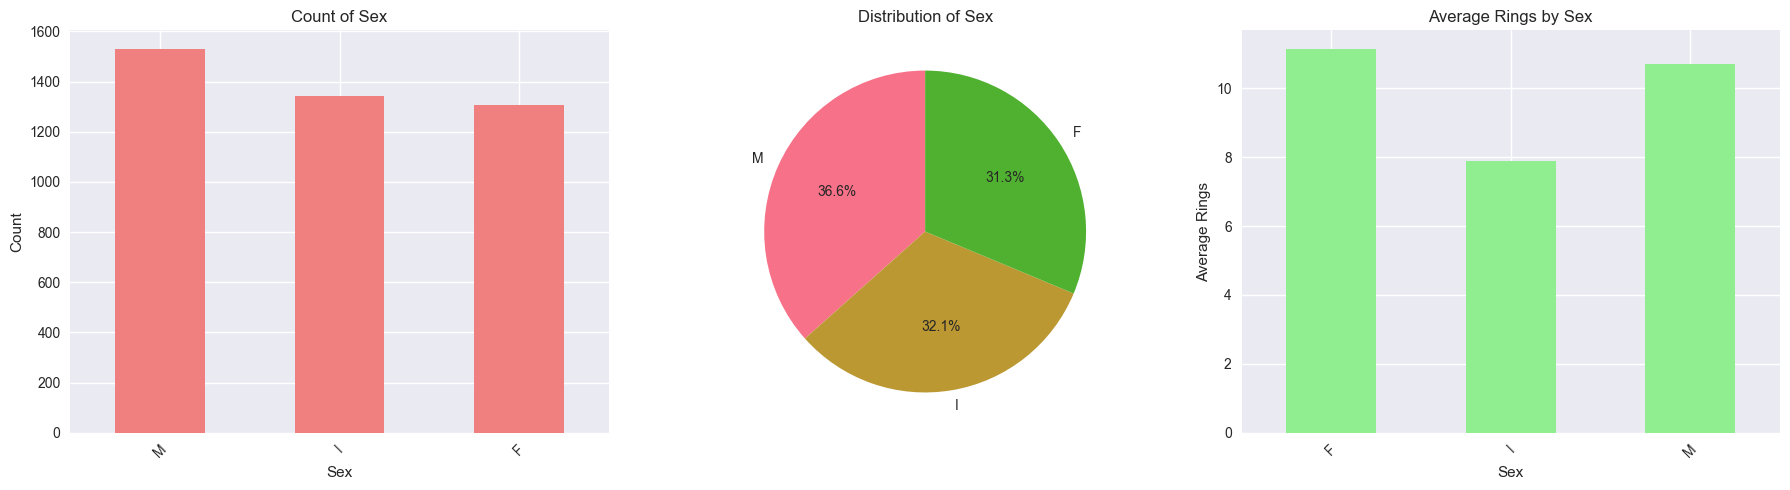

In [ ]:
# Cell 6: Categorical Variable Analysis
print("🏷️ CATEGORICAL VARIABLES ANALYSIS")
print("=" * 40)

categorical_cols = df.select_dtypes(include=["object"]).columns

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n📊 Analysis of {col}:")

        # Value counts
        value_counts = df[col].value_counts()
        print("Value counts:")
        print(value_counts)

        # Proportions
        proportions = df[col].value_counts(normalize=True) * 100
        print("\nProportions (%):")
        print(proportions.round(2))

        # Visualization
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Bar plot
        value_counts.plot(kind="bar", ax=axes[0], color="lightcoral")
        axes[0].set_title(f"Count of {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Count")
        axes[0].tick_params(axis="x", rotation=45)

        # Pie chart
        axes[1].pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%", startangle=90)
        axes[1].set_title(f"Distribution of {col}")

        # Target by category
        if target_col in df.columns:
            df.groupby(col)[target_col].mean().plot(kind="bar", ax=axes[2], color="lightgreen")
            axes[2].set_title(f"Average {target_col} by {col}")
            axes[2].set_xlabel(col)
            axes[2].set_ylabel(f"Average {target_col}")
            axes[2].tick_params(axis="x", rotation=45)

        plt.tight_layout()
        plt.show()
else:
    print("No categorical variables found in the dataset.")

📊 NUMERICAL VARIABLES DISTRIBUTION


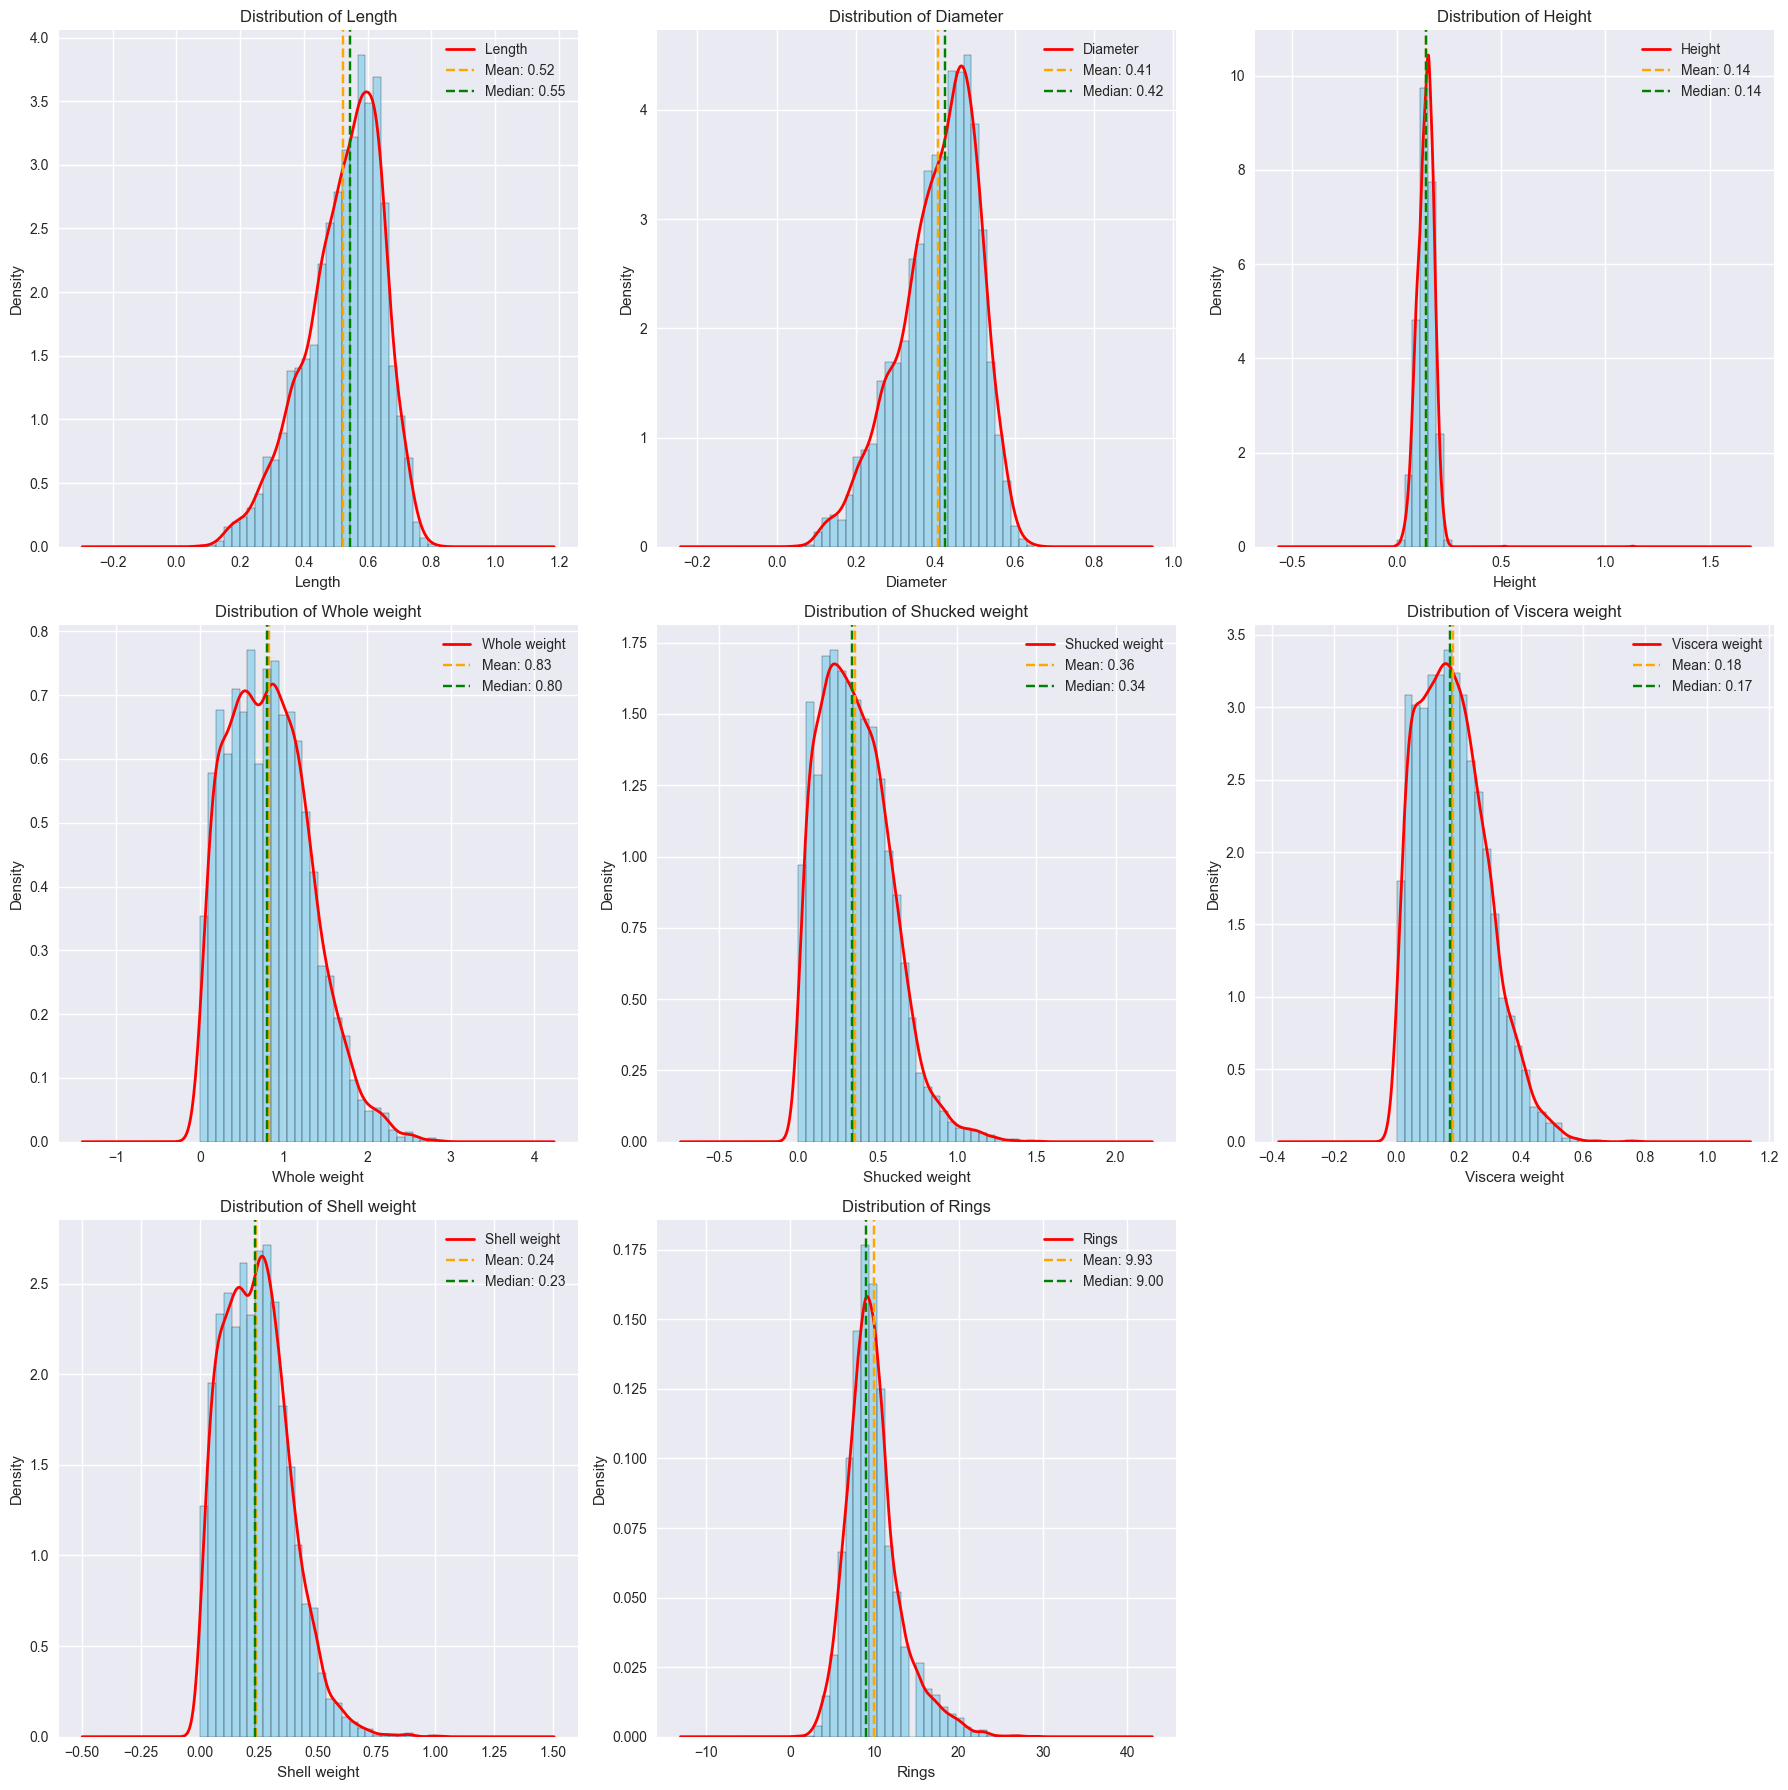


📈 Distribution Characteristics:
Length: Left-skewed (skew: -0.64), Light-tailed (kurtosis: 0.06)
Diameter: Left-skewed (skew: -0.61), Light-tailed (kurtosis: -0.05)
Height: Right-skewed (skew: 3.13), Heavy-tailed (kurtosis: 76.03)
Whole weight: Right-skewed (skew: 0.53), Light-tailed (kurtosis: -0.02)
Shucked weight: Right-skewed (skew: 0.72), Light-tailed (kurtosis: 0.60)
Viscera weight: Right-skewed (skew: 0.59), Light-tailed (kurtosis: 0.08)
Shell weight: Right-skewed (skew: 0.62), Light-tailed (kurtosis: 0.53)
Rings: Right-skewed (skew: 1.11), Light-tailed (kurtosis: 2.33)


In [ ]:
# Cell 7: Numerical Variables Distribution Analysis
print("📊 NUMERICAL VARIABLES DISTRIBUTION")
print("=" * 40)

numerical_cols = df.select_dtypes(include=[np.number]).columns
n_cols = len(numerical_cols)

# Create subplots for histograms
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else axes

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        # Histogram with KDE
        axes[i].hist(df[col], bins=30, alpha=0.7, density=True, color="skyblue", edgecolor="black")

        # Add KDE curve
        df[col].plot(kind="density", ax=axes[i], color="red", linewidth=2)

        # Add mean and median lines
        axes[i].axvline(df[col].mean(), color="orange", linestyle="--", label=f"Mean: {df[col].mean():.2f}")
        axes[i].axvline(df[col].median(), color="green", linestyle="--", label=f"Median: {df[col].median():.2f}")

        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Density")
        axes[i].legend()

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Distribution statistics
print("\n📈 Distribution Characteristics:")
for col in numerical_cols:
    skew = df[col].skew()
    kurt = df[col].kurtosis()

    skew_interpretation = "Right-skewed" if skew > 0.5 else "Left-skewed" if skew < -0.5 else "Approximately symmetric"
    kurt_interpretation = "Heavy-tailed" if kurt > 3 else "Light-tailed" if kurt < 3 else "Normal-tailed"

    print(f"{col}: {skew_interpretation} (skew: {skew:.2f}), {kurt_interpretation} (kurtosis: {kurt:.2f})")

🚨 OUTLIER DETECTION AND ANALYSIS


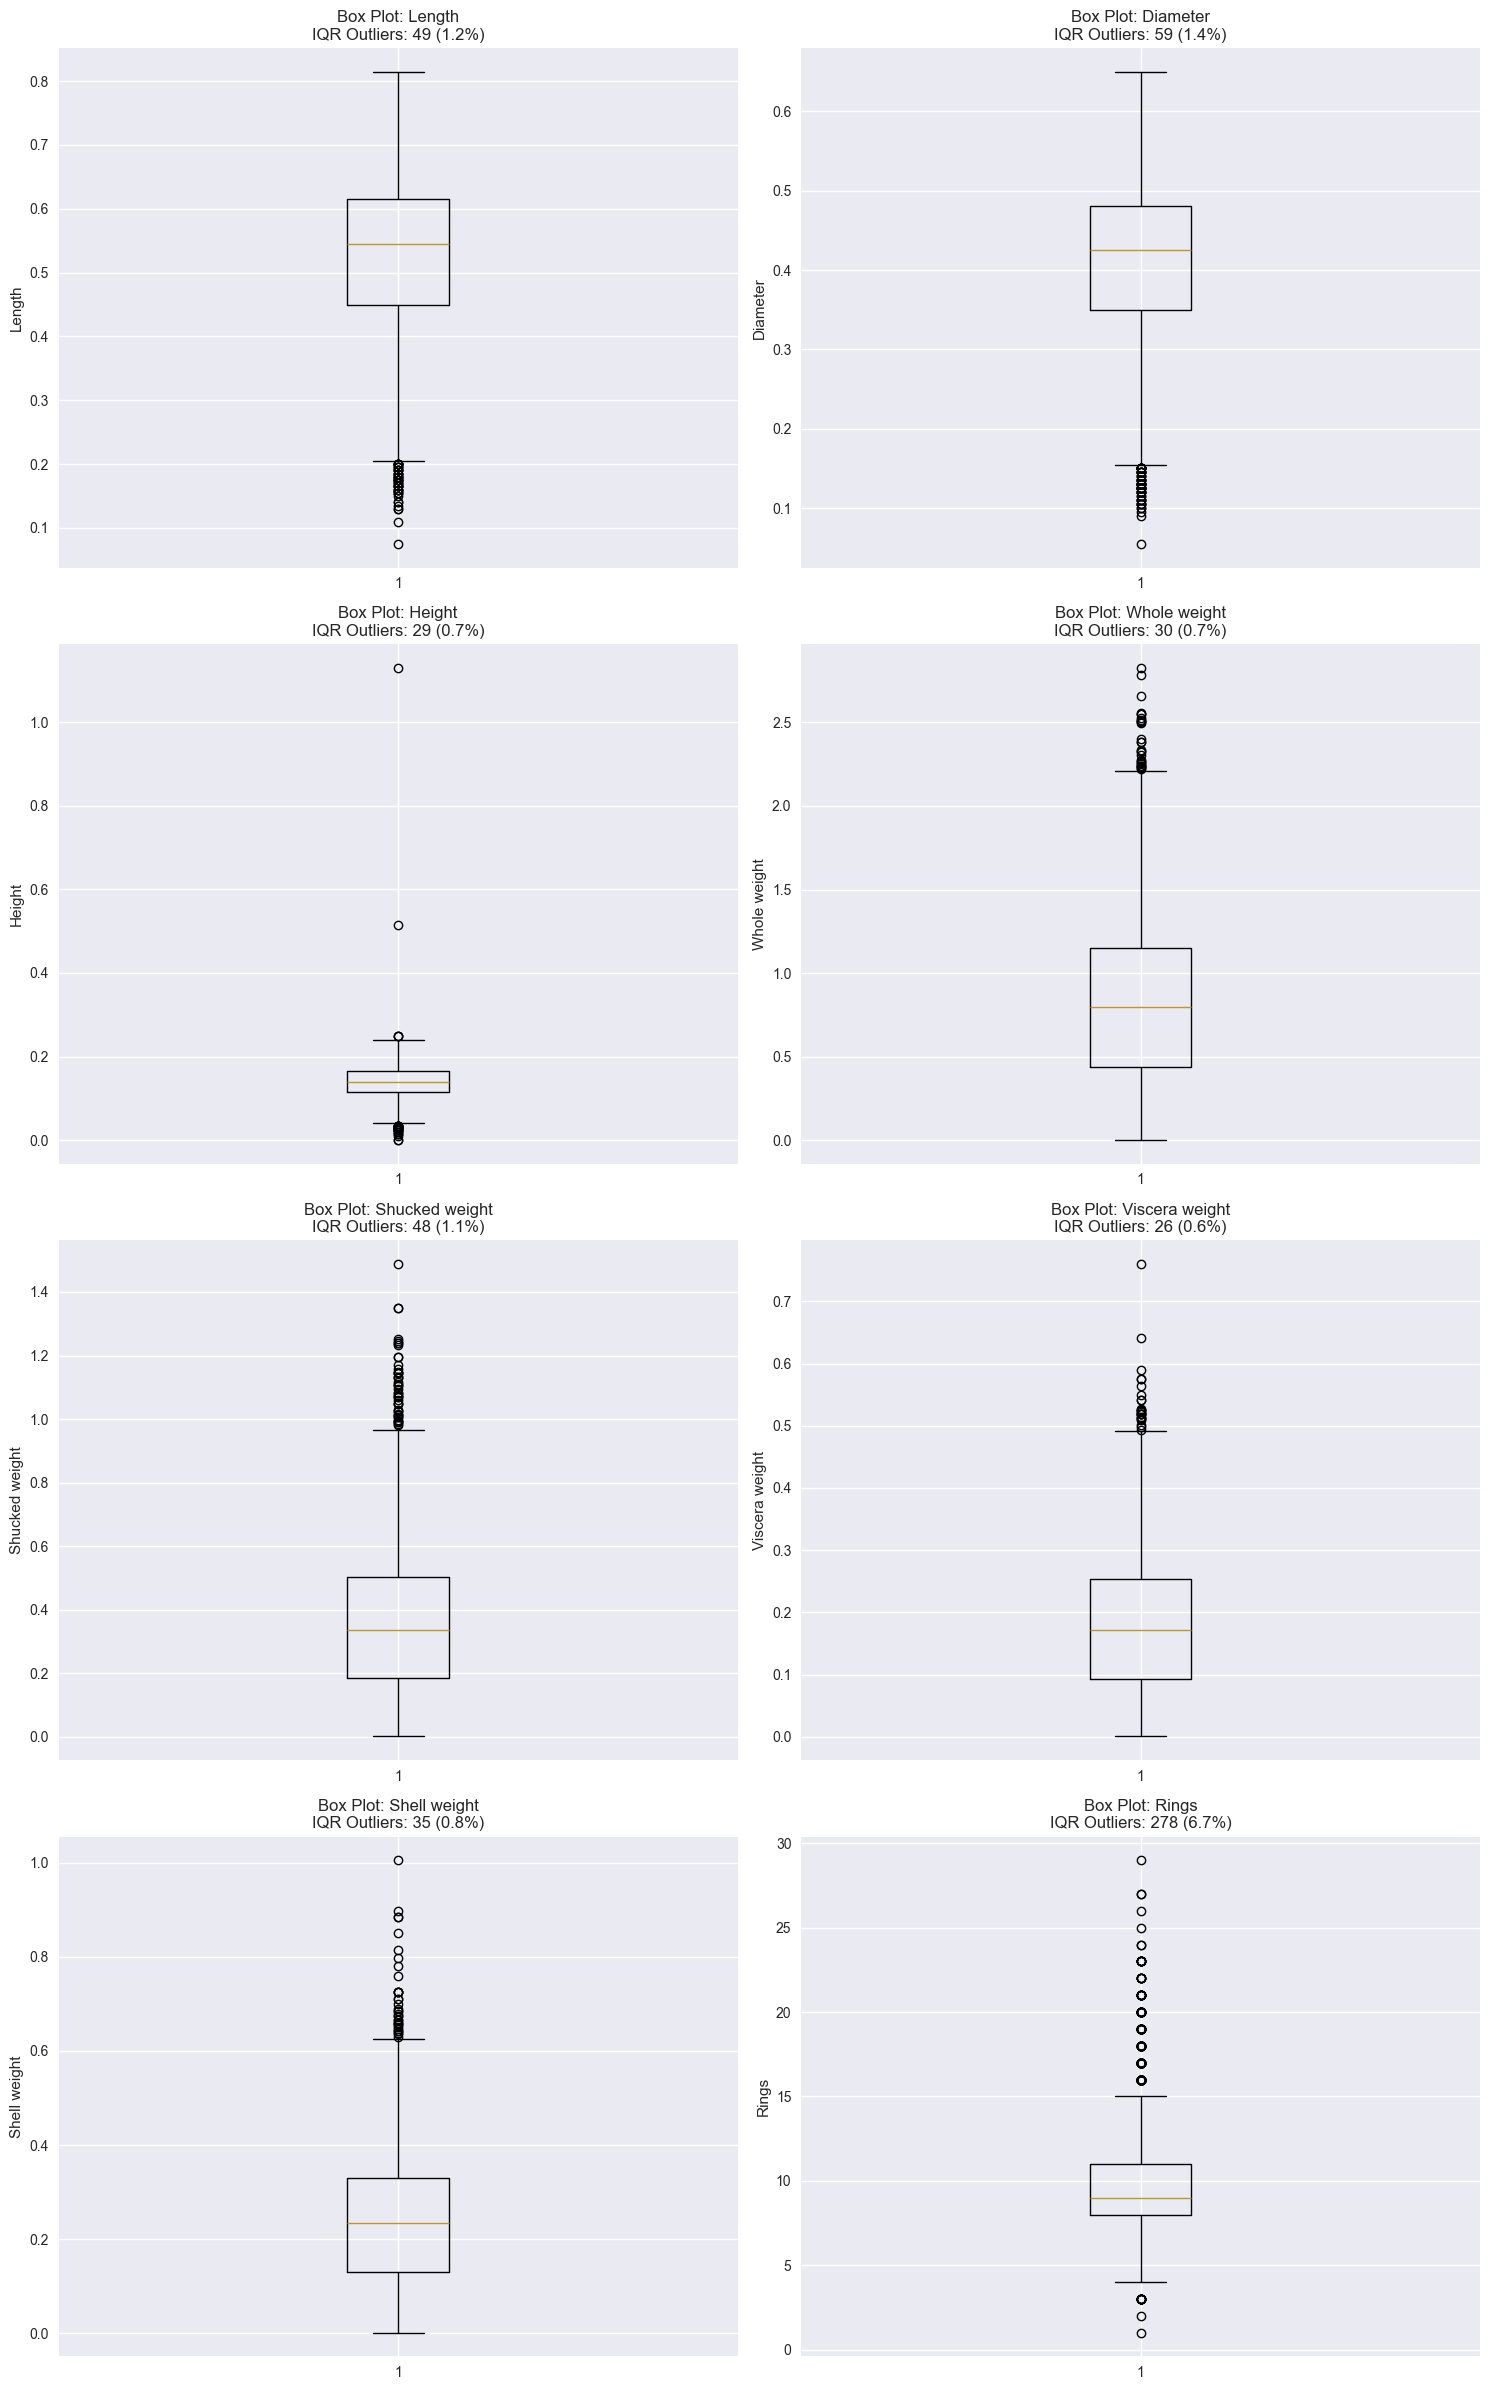


📊 Outlier Summary:
           Column  IQR_Outliers  IQR_Percentage  ZScore_Outliers  \
0          Length            49        1.173091               15   
1        Diameter            59        1.412497               13   
2          Height            29        0.694278                5   
3    Whole weight            30        0.718219               19   
4  Shucked weight            48        1.149150               37   
5  Viscera weight            26        0.622456               22   
6    Shell weight            35        0.837922               27   
7           Rings           278        6.655494               62   

   ZScore_Percentage  
0           0.359109  
1           0.311228  
2           0.119703  
3           0.454872  
4           0.885803  
5           0.526694  
6           0.646397  
7           1.484319  

🔍 Extreme Outliers Analysis:
Length: 15 extreme outliers (0.36%)
  Values: [0.075, 0.13, 0.11, 0.16, 0.155, 0.155, 0.15, 0.16, 0.14, 0.135, 0.16, 0.13, 0.155, 

In [ ]:
# Cell 8: Outlier Detection and Analysis
print("🚨 OUTLIER DETECTION AND ANALYSIS")
print("=" * 40)


def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


def detect_outliers_zscore(data, column, threshold=3):
    """Detect outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(data[column]))
    outliers = data[z_scores > threshold]
    return outliers


# Outlier analysis for each numerical column
outlier_summary = []

fig, axes = plt.subplots((len(numerical_cols) + 1) // 2, 2, figsize=(15, 6 * ((len(numerical_cols) + 1) // 2)))
axes = axes.flatten() if len(numerical_cols) > 2 else [axes] if len(numerical_cols) == 2 else axes

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        # IQR method
        outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, col)

        # Z-score method
        outliers_zscore = detect_outliers_zscore(df, col)

        # Store results
        outlier_summary.append(
            {
                "Column": col,
                "IQR_Outliers": len(outliers_iqr),
                "IQR_Percentage": (len(outliers_iqr) / len(df)) * 100,
                "ZScore_Outliers": len(outliers_zscore),
                "ZScore_Percentage": (len(outliers_zscore) / len(df)) * 100,
            }
        )

        # Box plot
        axes[i].boxplot(df[col], vert=True)
        axes[i].set_title(f"Box Plot: {col}\nIQR Outliers: {len(outliers_iqr)} ({(len(outliers_iqr) / len(df) * 100):.1f}%)")
        axes[i].set_ylabel(col)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    if i < len(axes):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Outlier summary table
outlier_df = pd.DataFrame(outlier_summary)
print("\n📊 Outlier Summary:")
print(outlier_df)

# Extreme outliers (beyond 3 standard deviations)
print("\n🔍 Extreme Outliers Analysis:")
for col in numerical_cols:
    extreme_outliers = df[np.abs(stats.zscore(df[col])) > 3]
    if len(extreme_outliers) > 0:
        print(f"{col}: {len(extreme_outliers)} extreme outliers ({len(extreme_outliers) / len(df) * 100:.2f}%)")
        print(f"  Values: {extreme_outliers[col].tolist()}")

🔗 CORRELATION ANALYSIS


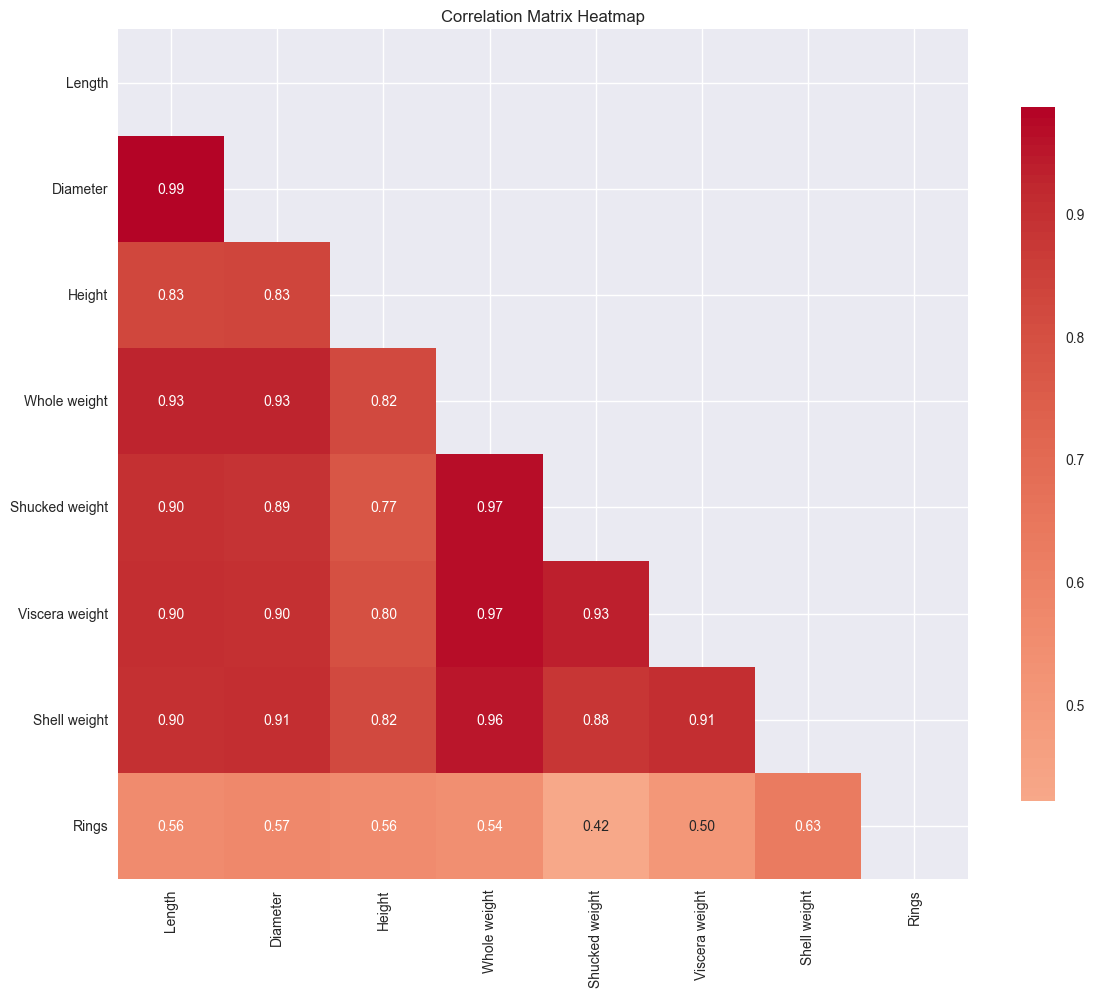


🔥 Strong Correlations (|r| > 0.7):
        Variable 1      Variable 2  Correlation
0           Length        Diameter     0.986812
15    Whole weight  Shucked weight     0.969405
16    Whole weight  Viscera weight     0.966375
17    Whole weight    Shell weight     0.955355
18  Shucked weight  Viscera weight     0.931961
7         Diameter    Whole weight     0.925452
2           Length    Whole weight     0.925261
20  Viscera weight    Shell weight     0.907656
10        Diameter    Shell weight     0.905330
4           Length  Viscera weight     0.903018
9         Diameter  Viscera weight     0.899724
3           Length  Shucked weight     0.897914
5           Length    Shell weight     0.897706
8         Diameter  Shucked weight     0.893162
19  Shucked weight    Shell weight     0.882617
6         Diameter          Height     0.833684
1           Length          Height     0.827554
11          Height    Whole weight     0.819221
14          Height    Shell weight     0.817338
13  

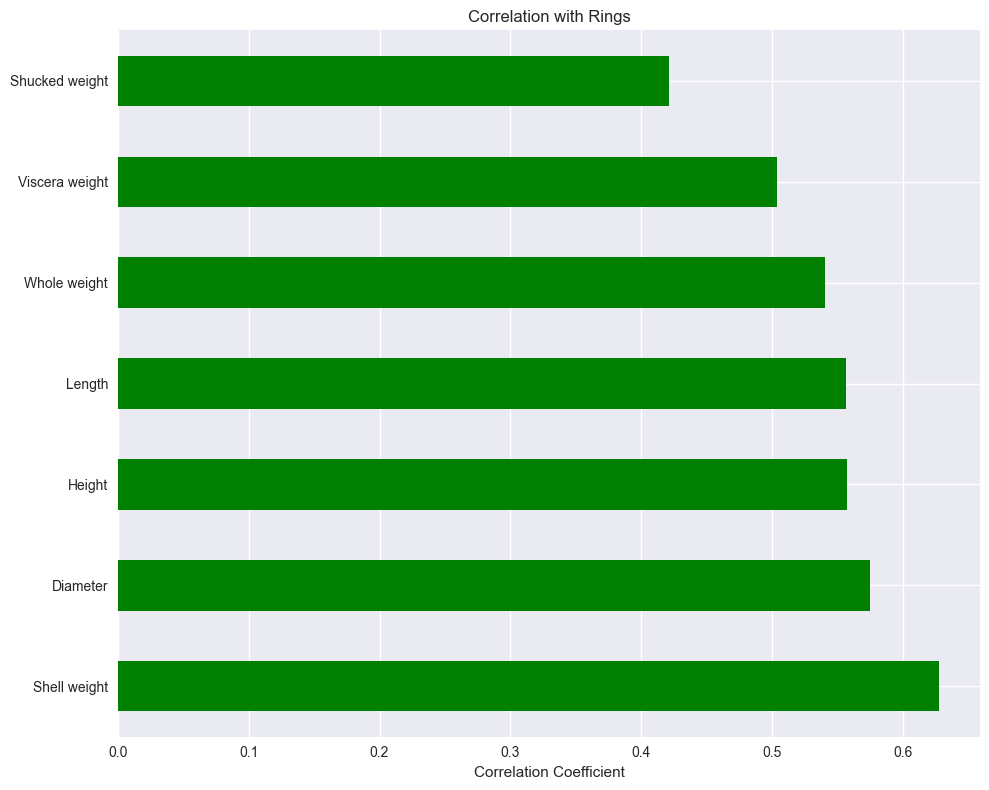

In [ ]:
# Cell 9: Correlation Analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 30)

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, mask=mask, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f", cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

# Strong correlations (absolute value > 0.7)
print("\n🔥 Strong Correlations (|r| > 0.7):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_corr.append(
                {
                    "Variable 1": correlation_matrix.columns[i],
                    "Variable 2": correlation_matrix.columns[j],
                    "Correlation": corr_val,
                }
            )

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr)
    print(strong_corr_df.sort_values("Correlation", key=abs, ascending=False))
else:
    print("No strong correlations found.")

# Correlation with target variable
if target_col in numerical_cols:
    target_corr = correlation_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)

    print(f"\n🎯 Correlation with {target_col}:")
    print(target_corr)

    # Visualize correlations with target
    plt.figure(figsize=(10, 8))
    target_corr.plot(kind="barh", color=["red" if x < 0 else "green" for x in target_corr.values])
    plt.title(f"Correlation with {target_col}")
    plt.xlabel("Correlation Coefficient")
    plt.tight_layout()
    plt.show()

🔍 FEATURE RELATIONSHIPS


<Figure size 1500x1500 with 0 Axes>

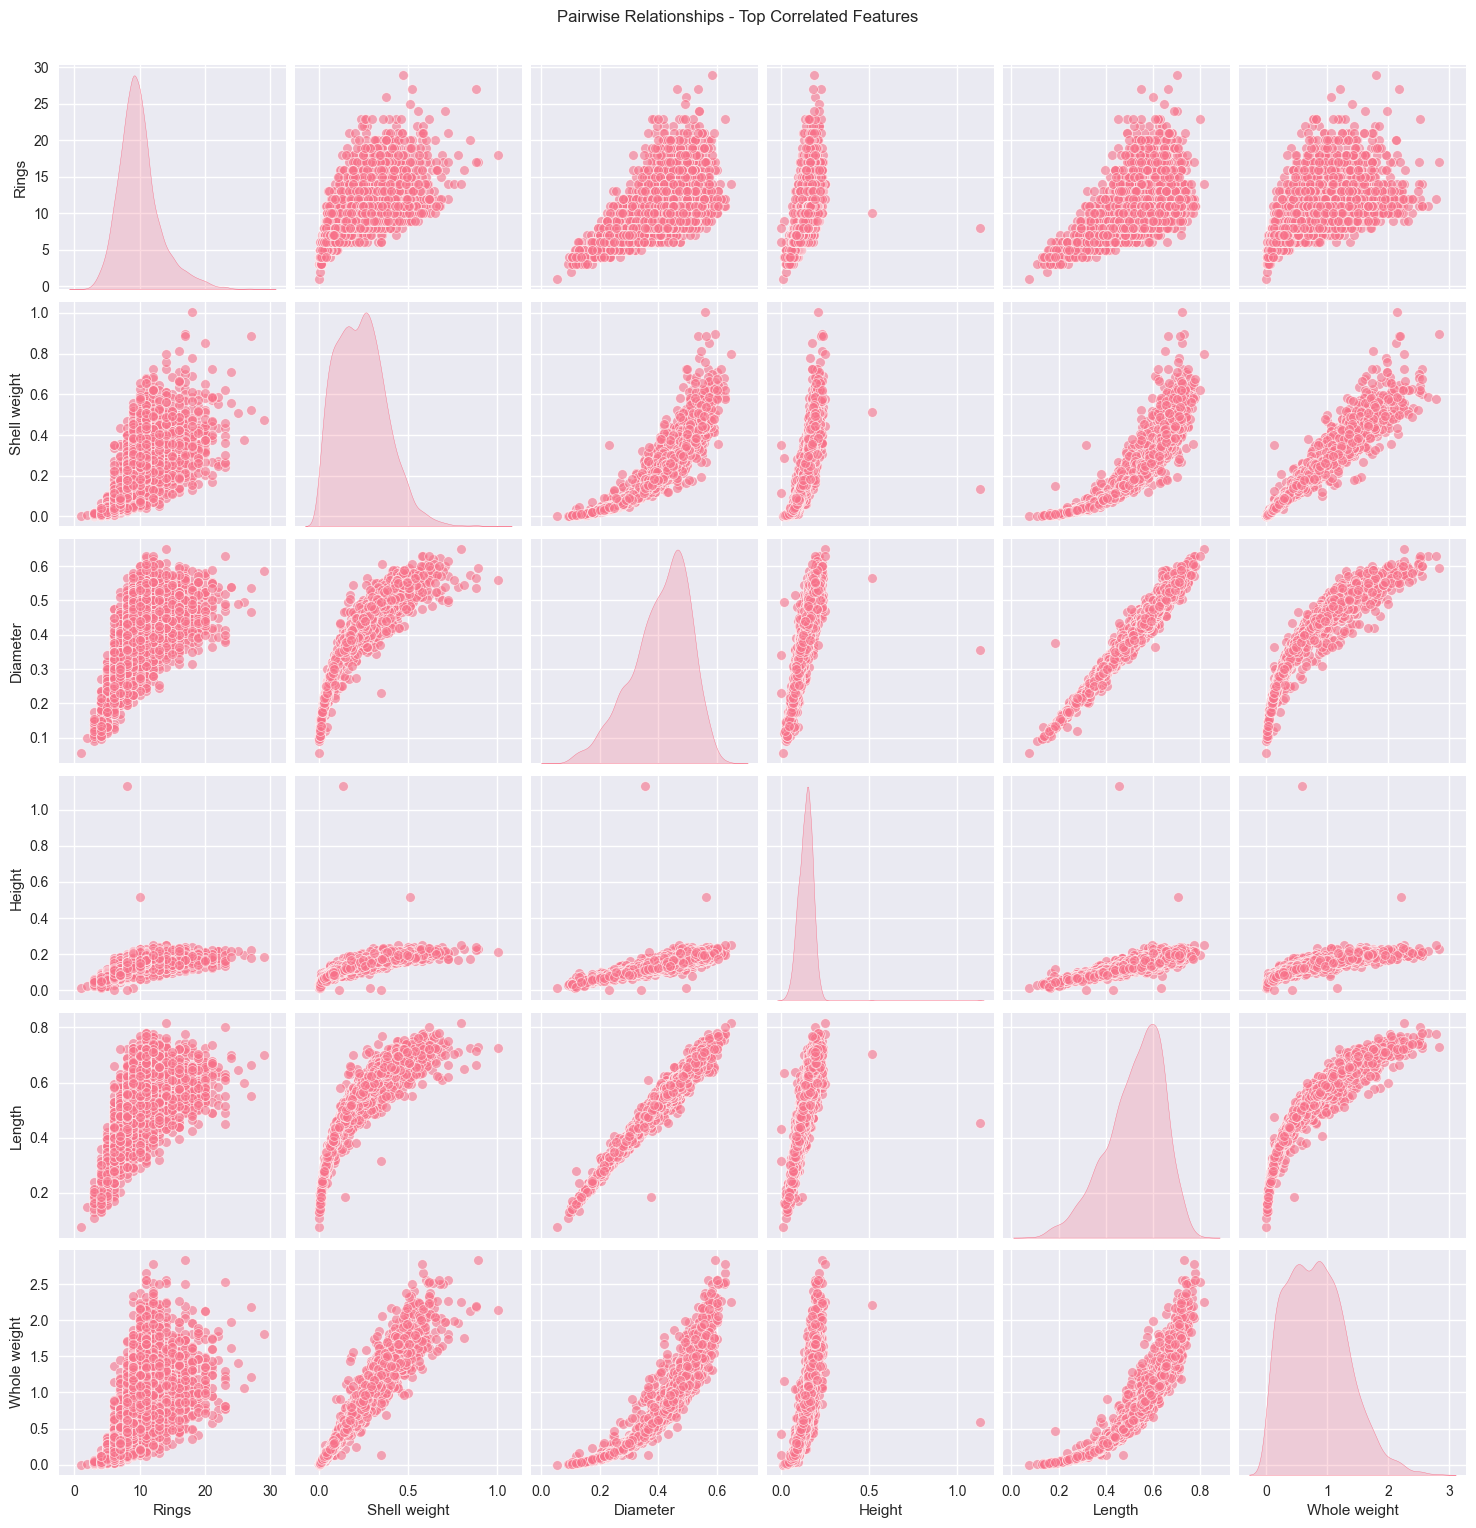

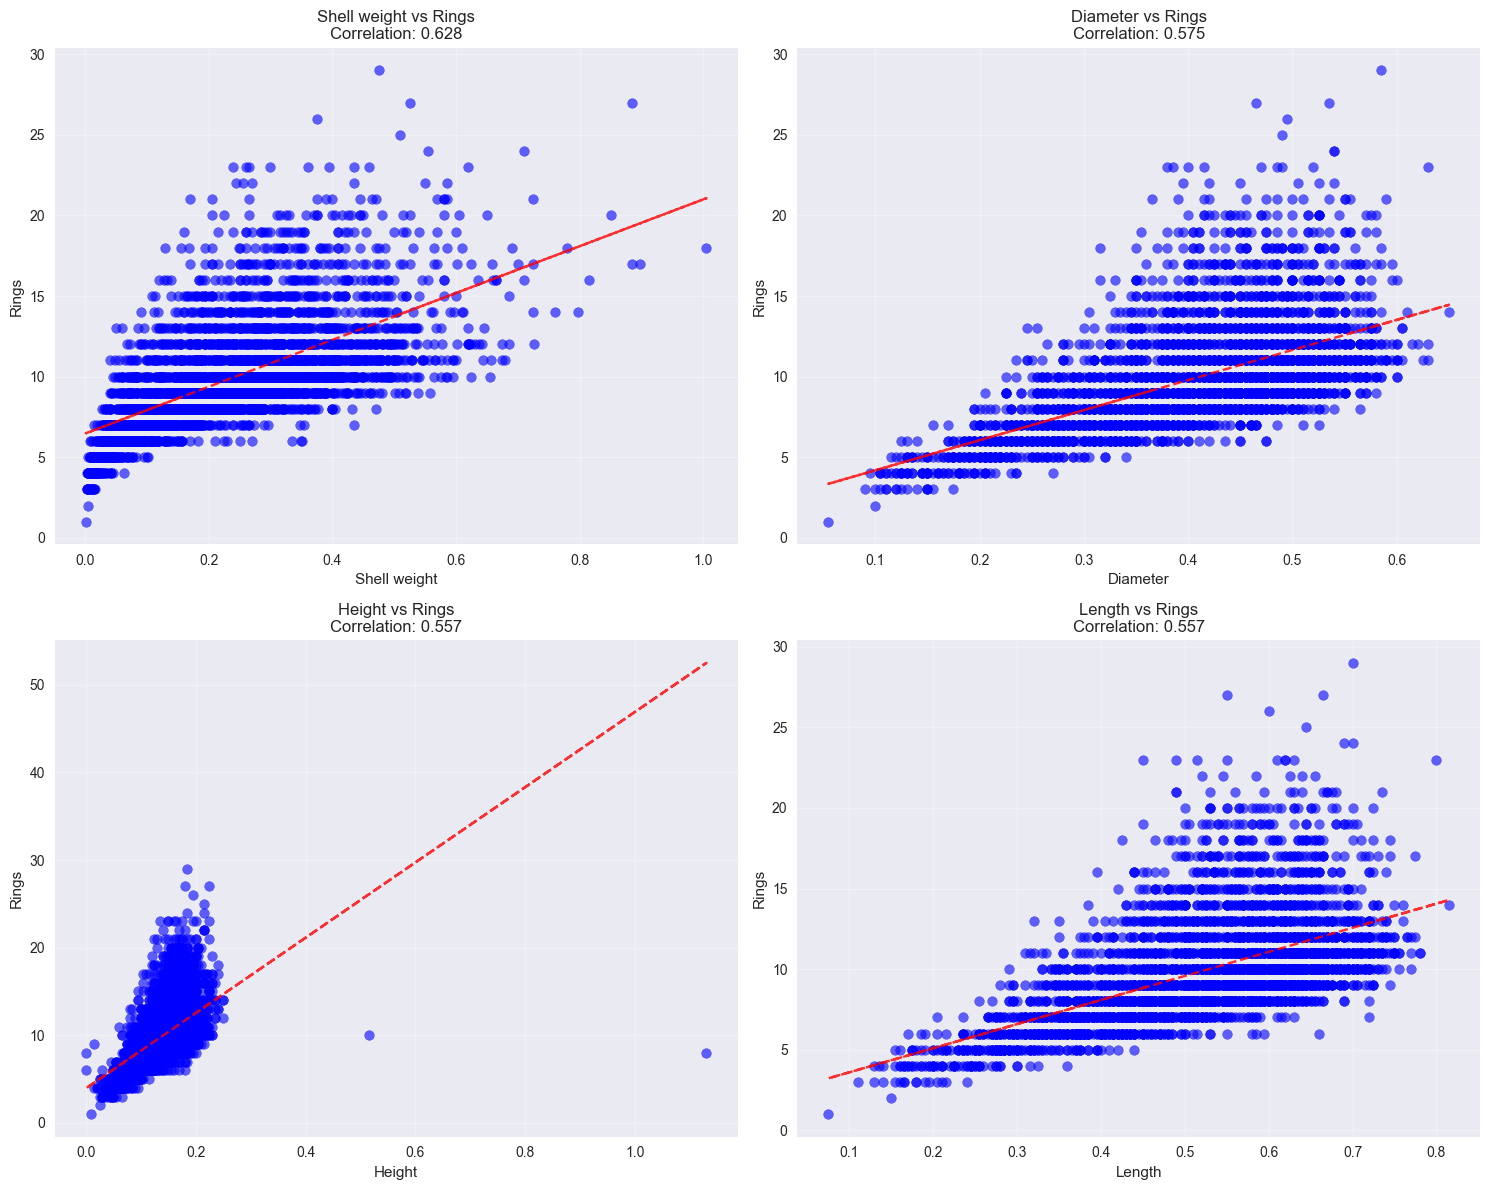

In [ ]:
# Cell 10: Feature Relationships and Scatter Plots
print("🔍 FEATURE RELATIONSHIPS")
print("=" * 30)

# Pairwise scatter plots for highly correlated features with target
if target_col in numerical_cols:
    # Get top correlated features with target
    target_corr = df[numerical_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
    top_features = target_corr.head(6).index.tolist()  # Top 6 including target

    if target_col not in top_features:
        top_features.append(target_col)

    # Create pairplot
    plt.figure(figsize=(15, 15))
    sns.pairplot(df[top_features], diag_kind="kde", plot_kws={"alpha": 0.6})
    plt.suptitle("Pairwise Relationships - Top Correlated Features", y=1.02)
    plt.show()

    # Individual scatter plots with target
    other_features = [col for col in top_features if col != target_col][:4]  # Top 4 features

    if other_features:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()

        for i, feature in enumerate(other_features):
            if i < 4:
                # Scatter plot
                axes[i].scatter(df[feature], df[target_col], alpha=0.6, color="blue")

                # Add regression line
                z = np.polyfit(df[feature], df[target_col], 1)
                p = np.poly1d(z)
                axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

                # Calculate correlation
                corr_coef = df[feature].corr(df[target_col])

                axes[i].set_xlabel(feature)
                axes[i].set_ylabel(target_col)
                axes[i].set_title(f"{feature} vs {target_col}\nCorrelation: {corr_coef:.3f}")
                axes[i].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

🔀 CATEGORICAL vs NUMERICAL ANALYSIS

📊 Analysis of Sex vs Numerical Variables:
Sex vs Length: F-statistic = 927.933, p-value = 0.000
Sex vs Diameter: F-statistic = 993.615, p-value = 0.000
Sex vs Height: F-statistic = 784.233, p-value = 0.000
Sex vs Whole weight: F-statistic = 951.007, p-value = 0.000


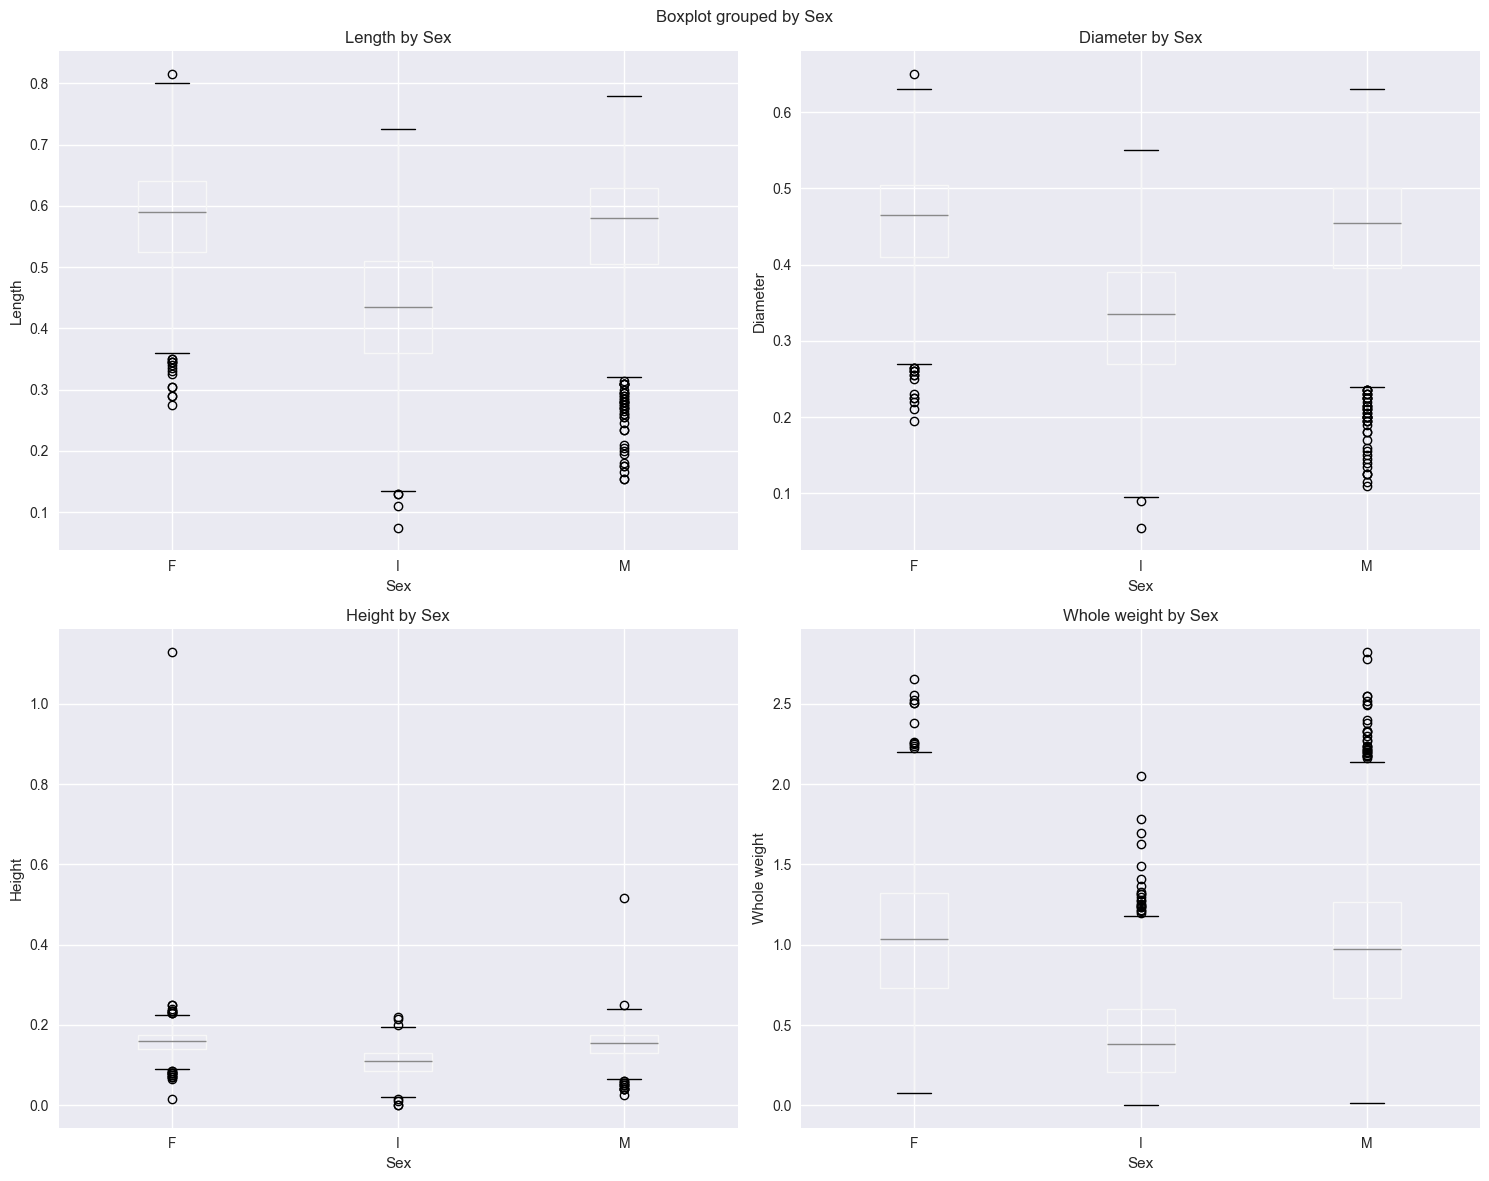


📈 Summary Statistics of Numerical Variables by Sex:
    Length               Diameter               Height                \
      mean median    std     mean median    std   mean median    std   
Sex                                                                    
F    0.579  0.590  0.086    0.455  0.465  0.071  0.158  0.160  0.040   
I    0.428  0.435  0.109    0.326  0.335  0.088  0.108  0.110  0.032   
M    0.561  0.580  0.103    0.439  0.455  0.084  0.151  0.155  0.035   

    Whole weight                
            mean median    std  
Sex                             
F          1.047  1.038  0.430  
I          0.431  0.384  0.286  
M          0.991  0.976  0.471  


In [ ]:
# Cell 11: Categorical vs Numerical Analysis
print("🔀 CATEGORICAL vs NUMERICAL ANALYSIS")
print("=" * 45)

if len(categorical_cols) > 0 and len(numerical_cols) > 0:
    for cat_col in categorical_cols:
        print(f"\n📊 Analysis of {cat_col} vs Numerical Variables:")

        # Statistical tests
        for num_col in numerical_cols[:4]:  # Limit to first 4 numerical columns
            groups = [df[df[cat_col] == category][num_col].values for category in df[cat_col].unique()]

            # ANOVA test
            try:
                f_stat, p_value = stats.f_oneway(*groups)
                print(f"{cat_col} vs {num_col}: F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")
            except:
                print(f"{cat_col} vs {num_col}: Could not perform ANOVA")

        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        axes = axes.flatten()

        num_cols_subset = numerical_cols[:4]  # First 4 numerical columns

        for i, num_col in enumerate(num_cols_subset):
            if i < 4:
                # Box plot
                df.boxplot(column=num_col, by=cat_col, ax=axes[i])
                axes[i].set_title(f"{num_col} by {cat_col}")
                axes[i].set_xlabel(cat_col)
                axes[i].set_ylabel(num_col)

        plt.tight_layout()
        plt.show()

        # Summary statistics by category
        print(f"\n📈 Summary Statistics of Numerical Variables by {cat_col}:")
        summary_by_cat = df.groupby(cat_col)[numerical_cols[:4]].agg(["mean", "median", "std"])
        print(summary_by_cat.round(3))

In [ ]:
# Cell 12: Advanced Statistical Analysis
print("📊 ADVANCED STATISTICAL ANALYSIS")
print("=" * 40)

# Normality tests
print("🔍 Normality Tests (Shapiro-Wilk):")
print("H0: Data is normally distributed")
print("H1: Data is not normally distributed")
print("-" * 50)

normality_results = []
for col in numerical_cols:
    # Sample for large datasets (Shapiro-Wilk works best with n < 5000)
    sample_size = min(1000, len(df))
    sample_data = df[col].sample(sample_size, random_state=42)

    stat, p_value = stats.shapiro(sample_data)
    is_normal = p_value > 0.05

    normality_results.append({"Variable": col, "Statistic": stat, "P-value": p_value, "Is_Normal": is_normal})

    print(f"{col}: Statistic = {stat:.4f}, P-value = {p_value:.4f}, Normal: {is_normal}")

normality_df = pd.DataFrame(normality_results)

# Anderson-Darling test for normality
print(f"\n🔍 Anderson-Darling Test Results:")
for col in numerical_cols[:3]:  # Limit for space
    result = stats.anderson(df[col], dist="norm")
    print(f"{col}: Statistic = {result.statistic:.4f}")
    for i, critical_value in enumerate(result.critical_values):
        significance_level = result.significance_level[i]
        if result.statistic < critical_value:
            print(f"  At {significance_level}% significance: Data appears normal")
            break
    else:
        print(f"  Data does not appear normal at standard significance levels")

# Variance homogeneity test (if categorical variables exist)
if len(categorical_cols) > 0:
    print(f"\n🔍 Levene's Test for Variance Homogeneity:")
    for cat_col in categorical_cols:
        for num_col in numerical_cols[:3]:  # Limit for space
            groups = [df[df[cat_col] == category][num_col].values for category in df[cat_col].unique()]
            try:
                stat, p_value = stats.levene(*groups)
                print(f"{num_col} across {cat_col}: Levene statistic = {stat:.4f}, p-value = {p_value:.4f}")
            except:
                print(f"{num_col} across {cat_col}: Could not perform Levene's test")

📊 ADVANCED STATISTICAL ANALYSIS
🔍 Normality Tests (Shapiro-Wilk):
H0: Data is normally distributed
H1: Data is not normally distributed
--------------------------------------------------
Length: Statistic = 0.9644, P-value = 0.0000, Normal: False
Diameter: Statistic = 0.9646, P-value = 0.0000, Normal: False
Height: Statistic = 0.9893, P-value = 0.0000, Normal: False
Whole weight: Statistic = 0.9734, P-value = 0.0000, Normal: False
Shucked weight: Statistic = 0.9647, P-value = 0.0000, Normal: False
Viscera weight: Statistic = 0.9654, P-value = 0.0000, Normal: False
Shell weight: Statistic = 0.9747, P-value = 0.0000, Normal: False
Rings: Statistic = 0.9310, P-value = 0.0000, Normal: False

🔍 Anderson-Darling Test Results:
Length: Statistic = 36.6212
  Data does not appear normal at standard significance levels
Diameter: Statistic = 36.4378
  Data does not appear normal at standard significance levels
Height: Statistic = 14.4931
  Data does not appear normal at standard significance level

🔄 DIMENSIONALITY REDUCTION ANALYSIS
📊 PCA Results:
Number of components: 8
Total variance explained by first 2 components: 0.926
Total variance explained by first 3 components: 0.958


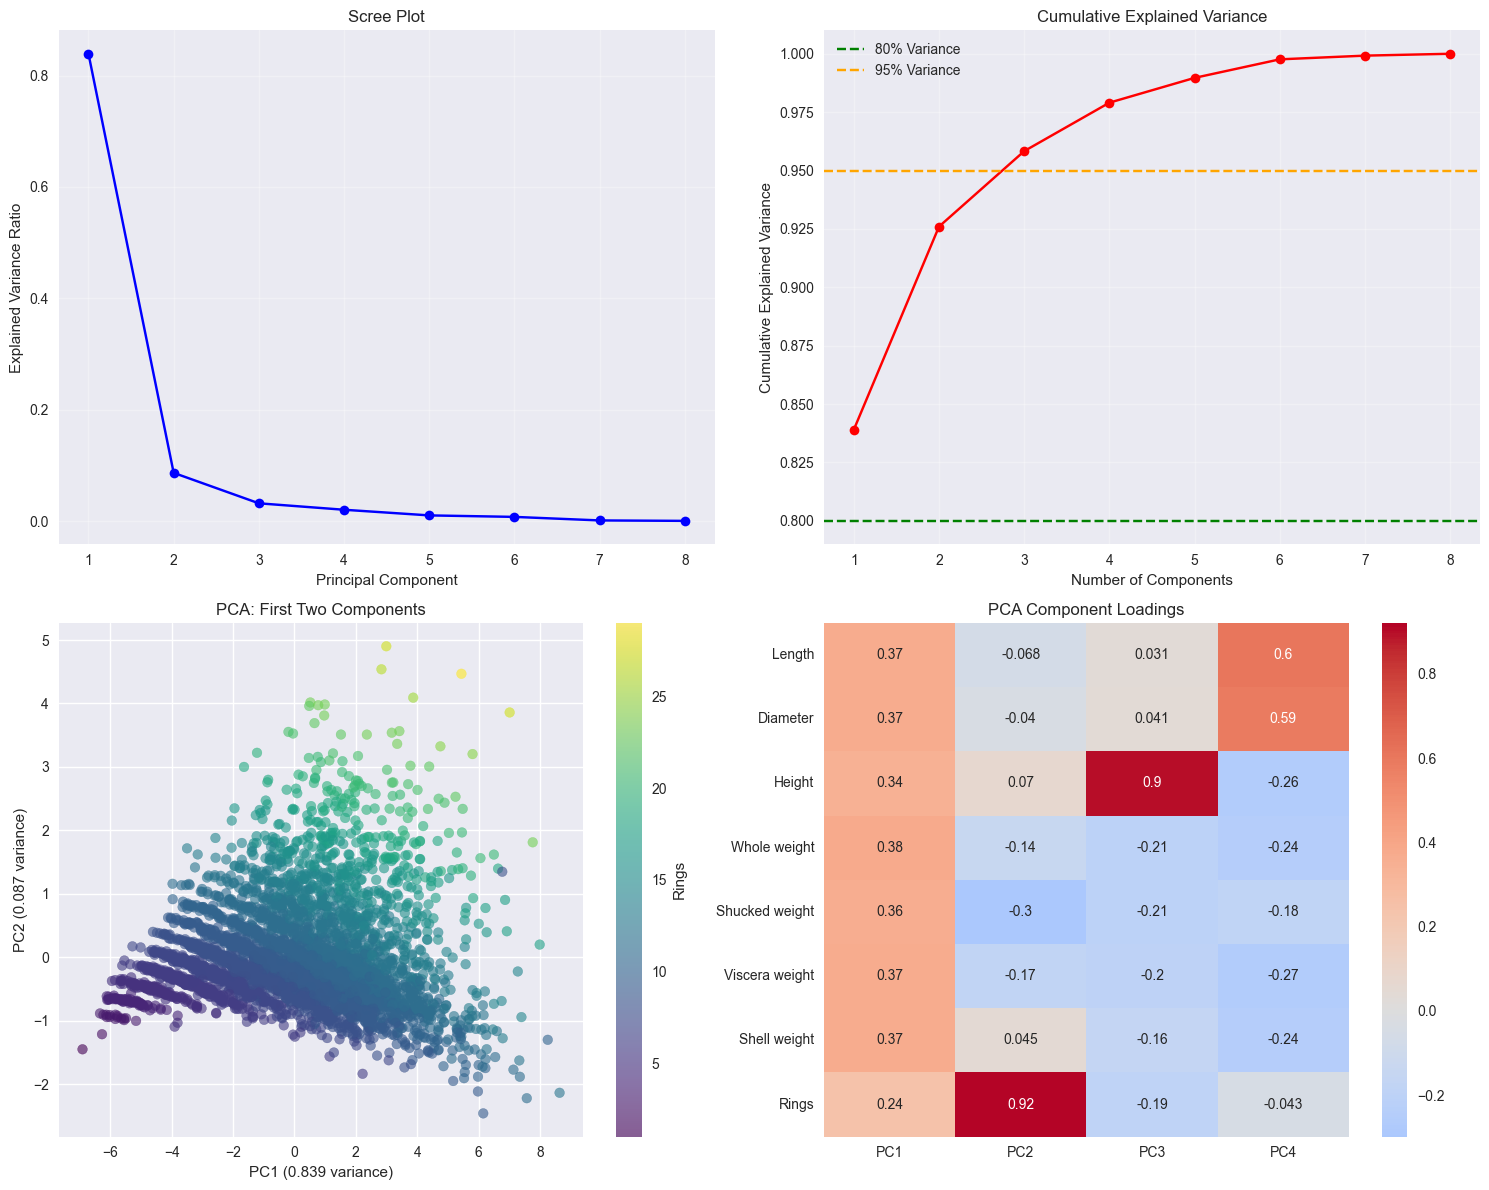


🔍 Component Loadings (First 3 Components):

PC1 (Explains 0.839 of variance):
  Whole weight: 0.378
  Diameter: 0.373
  Length: 0.372
  Shell weight: 0.371
  Viscera weight: 0.369

PC2 (Explains 0.087 of variance):
  Rings: 0.921
  Shucked weight: -0.299
  Viscera weight: -0.173
  Whole weight: -0.137
  Height: 0.070

PC3 (Explains 0.032 of variance):
  Height: 0.900
  Shucked weight: -0.208
  Whole weight: -0.206
  Viscera weight: -0.197
  Rings: -0.192


In [ ]:
# Cell 13: Dimensionality Reduction Analysis
print("🔄 DIMENSIONALITY REDUCTION ANALYSIS")
print("=" * 45)

# Prepare data for PCA
numerical_data = df[numerical_cols].copy()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("📊 PCA Results:")
print(f"Number of components: {len(explained_variance_ratio)}")
print(f"Total variance explained by first 2 components: {cumulative_variance[1]:.3f}")
print(f"Total variance explained by first 3 components: {cumulative_variance[2]:.3f}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Scree plot
axes[0, 0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, "bo-")
axes[0, 0].set_title("Scree Plot")
axes[0, 0].set_xlabel("Principal Component")
axes[0, 0].set_ylabel("Explained Variance Ratio")
axes[0, 0].grid(True, alpha=0.3)

# Cumulative variance plot
axes[0, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, "ro-")
axes[0, 1].axhline(y=0.8, color="green", linestyle="--", label="80% Variance")
axes[0, 1].axhline(y=0.95, color="orange", linestyle="--", label="95% Variance")
axes[0, 1].set_title("Cumulative Explained Variance")
axes[0, 1].set_xlabel("Number of Components")
axes[0, 1].set_ylabel("Cumulative Explained Variance")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# PCA scatter plot (first 2 components)
scatter = axes[1, 0].scatter(pca_result[:, 0], pca_result[:, 1], c=df[target_col], cmap="viridis", alpha=0.6)
axes[1, 0].set_title("PCA: First Two Components")
axes[1, 0].set_xlabel(f"PC1 ({explained_variance_ratio[0]:.3f} variance)")
axes[1, 0].set_ylabel(f"PC2 ({explained_variance_ratio[1]:.3f} variance)")
plt.colorbar(scatter, ax=axes[1, 0], label=target_col)

# Component loadings heatmap
components_df = pd.DataFrame(
    pca.components_[:4].T,  # First 4 components
    columns=[f"PC{i + 1}" for i in range(4)],
    index=numerical_cols,
)

sns.heatmap(components_df, annot=True, cmap="coolwarm", center=0, ax=axes[1, 1])
axes[1, 1].set_title("PCA Component Loadings")

plt.tight_layout()
plt.show()

# Component interpretation
print("\n🔍 Component Loadings (First 3 Components):")
for i in range(min(3, len(pca.components_))):
    print(f"\nPC{i + 1} (Explains {explained_variance_ratio[i]:.3f} of variance):")
    loadings = pd.Series(pca.components_[i], index=numerical_cols)
    top_loadings = loadings.abs().sort_values(ascending=False).head()
    for feature, loading in top_loadings.items():
        print(f"  {feature}: {loadings[feature]:.3f}")

In [ ]:
# Cell 14: Data Quality and Recommendations
print("✅ DATA QUALITY SUMMARY & RECOMMENDATIONS")
print("=" * 50)

# Data quality summary
print("📋 DATA QUALITY SUMMARY:")
print(f"✓ Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"✓ Missing values: {df.isnull().sum().sum()} total")
print(f"✓ Duplicate rows: {df.duplicated().sum()}")
print(f"✓ Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Feature summary
print(f"\n📊 FEATURE SUMMARY:")
print(f"✓ Numerical features: {len(numerical_cols)}")
print(f"✓ Categorical features: {len(categorical_cols)}")

# Distribution summary
normal_features = sum([result["Is_Normal"] for result in normality_results])
print(f"✓ Normally distributed features: {normal_features}/{len(numerical_cols)}")

# Correlation insights
if target_col in numerical_cols:
    target_corr = df[numerical_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
    high_corr_features = sum(target_corr > 0.5) - 1  # Exclude target itself
    print(f"✓ Features highly correlated with target (|r| > 0.5): {high_corr_features}")

print(f"\n🔍 KEY INSIGHTS:")

# Target variable insights
if target_col in df.columns:
    print(f"• {target_col} distribution: Mean = {df[target_col].mean():.2f}, Std = {df[target_col].std():.2f}")

    skew = df[target_col].skew()
    if abs(skew) > 0.5:
        skew_direction = "right" if skew > 0 else "left"
        print(f"• {target_col} is {skew_direction}-skewed (skewness = {skew:.2f})")

# Outlier insights
total_outliers = sum([result["IQR_Outliers"] for result in outlier_summary])
print(f"• Total outliers detected (IQR method): {total_outliers}")

# Feature relationship insights
if target_col in numerical_cols:
    target_corr = df[numerical_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
    top_feature = target_corr.index[1] if len(target_corr) > 1 else None
    if top_feature:
        print(f"• Strongest predictor: {top_feature} (correlation = {target_corr[top_feature]:.3f})")

print(f"\n💡 RECOMMENDATIONS:")

# Missing data recommendations
if df.isnull().sum().sum() > 0:
    print("• Handle missing values before modeling")

# Outlier recommendations
if total_outliers > len(df) * 0.05:  # More than 5% outliers
    print("• Consider outlier treatment (>5% of data points are outliers)")

# Normality recommendations
non_normal_features = len(numerical_cols) - normal_features
if non_normal_features > 0:
    print(f"• Consider data transformation for {non_normal_features} non-normal features")

# Correlation recommendations
if target_col in numerical_cols:
    target_corr = df[numerical_cols].corrwith(df[target_col]).abs().sort_values(ascending=False)
    weak_features = sum(target_corr < 0.1) - (1 if target_col in target_corr.index else 0)
    if weak_features > 0:
        print(f"• Consider feature selection: {weak_features} features have weak correlation with target")

# PCA recommendations
variance_80_components = np.argmax(cumulative_variance >= 0.8) + 1
if variance_80_components < len(numerical_cols):
    print(f"• Dimensionality reduction possible: {variance_80_components} components explain 80% variance")

print(f"\n🎯 MODELING SUGGESTIONS:")
print("• Consider ensemble methods due to feature complexity")
print("• Evaluate both linear and non-linear models")
print("• Use cross-validation for robust model evaluation")
print("• Monitor for overfitting given the feature relationships")

print(f"\n📝 NEXT STEPS:")
print("1. Handle data quality issues (missing values, outliers)")
print("2. Feature engineering based on correlation insights")
print("3. Split data into train/validation/test sets")
print("4. Baseline model development")
print("5. Feature selection and hyperparameter tuning")

✅ DATA QUALITY SUMMARY & RECOMMENDATIONS
📋 DATA QUALITY SUMMARY:
✓ Dataset shape: 4177 rows, 9 columns
✓ Missing values: 0 total
✓ Duplicate rows: 0
✓ Memory usage: 0.45 MB

📊 FEATURE SUMMARY:
✓ Numerical features: 8
✓ Categorical features: 1
✓ Normally distributed features: 0/8
✓ Features highly correlated with target (|r| > 0.5): 6

🔍 KEY INSIGHTS:
• Rings distribution: Mean = 9.93, Std = 3.22
• Rings is right-skewed (skewness = 1.11)
• Total outliers detected (IQR method): 554
• Strongest predictor: Shell weight (correlation = 0.628)

💡 RECOMMENDATIONS:
• Consider outlier treatment (>5% of data points are outliers)
• Consider data transformation for 8 non-normal features
• Dimensionality reduction possible: 1 components explain 80% variance

🎯 MODELING SUGGESTIONS:
• Consider ensemble methods due to feature complexity
• Evaluate both linear and non-linear models
• Use cross-validation for robust model evaluation
• Monitor for overfitting given the feature relationships

📝 NEXT STEPS

In [ ]:
# Cell 15: Export Summary Report
print("📄 GENERATING SUMMARY REPORT")
print("=" * 35)

# Create a comprehensive summary dictionary
summary_report = {
    "dataset_info": {
        "shape": df.shape,
        "memory_usage_mb": df.memory_usage(deep=True).sum() / 1024**2,
        "missing_values": df.isnull().sum().sum(),
        "duplicates": df.duplicated().sum(),
    },
    "feature_info": {
        "numerical_features": len(numerical_cols),
        "categorical_features": len(categorical_cols),
        "total_features": len(df.columns),
    },
    "target_analysis": {
        "target_variable": target_col,
        "mean": df[target_col].mean() if target_col in df.columns else None,
        "std": df[target_col].std() if target_col in df.columns else None,
        "skewness": df[target_col].skew() if target_col in df.columns else None,
        "range": [df[target_col].min(), df[target_col].max()] if target_col in df.columns else None,
    },
    "correlation_insights": {
        "strong_correlations": len(strong_corr) if "strong_corr" in locals() else 0,
        "top_predictor": target_corr.index[1] if target_col in numerical_cols and len(target_corr) > 1 else None,
        "top_correlation": float(target_corr.iloc[1]) if target_col in numerical_cols and len(target_corr) > 1 else None,
    },
    "data_quality": {
        "outlier_percentage": (total_outliers / len(df)) * 100,
        "normal_features": normal_features,
        "non_normal_features": len(numerical_cols) - normal_features,
    },
    "pca_insights": {
        "components_for_80_variance": int(variance_80_components),
        "first_two_components_variance": float(cumulative_variance[1]),
    },
}

# Save summary to file
import json

with open("../data/eda_summary.json", "w") as f:
    json.dump(summary_report, f, indent=2, default=str)

print("✅ EDA Summary saved to '../data/eda_summary.json'")

# Display final summary
print("\n🎉 EDA COMPLETE!")
print("=" * 20)
print("Key files generated:")
print("• EDA summary: ../data/eda_summary.json")
print("\nThis comprehensive EDA provides insights for:")
print("• Data preprocessing decisions")
print("• Feature engineering strategies")
print("• Model selection guidance")
print("• Performance evaluation metrics")

print(f"\n📱 Dataset Overview:")
print(f"• {df.shape[0]:,} samples with {df.shape[1]} features")
print(f"• Target variable: {target_col}")
print(f"• Ready for ML pipeline development! 🚀")

📄 GENERATING SUMMARY REPORT
✅ EDA Summary saved to '../data/eda_summary.json'

🎉 EDA COMPLETE!
Key files generated:
• EDA summary: ../data/eda_summary.json

This comprehensive EDA provides insights for:
• Data preprocessing decisions
• Feature engineering strategies
• Model selection guidance
• Performance evaluation metrics

📱 Dataset Overview:
• 4,177 samples with 9 features
• Target variable: Rings
• Ready for ML pipeline development! 🚀
